In [1]:
# Code for module imports
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

xls = pd.ExcelFile('DEA_kV_strain_data.xlsx')
data = pd.read_excel(xls, 'Data')
uncertainties = pd.read_excel(xls, 'Uncertainties')

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


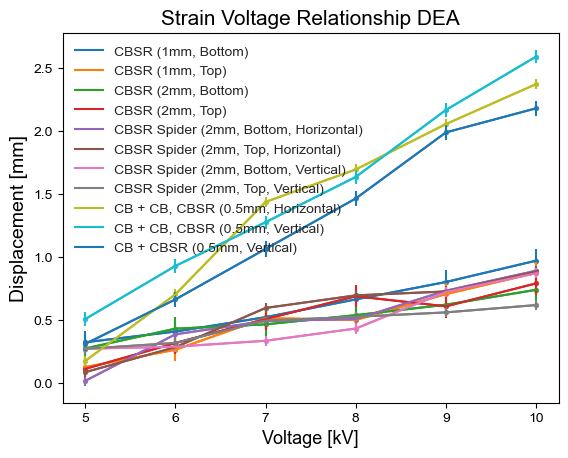

In [21]:
# Code for plotting naive theoretical vs experimental
var = pd.read_excel("DEA_kV_strain_data.xlsx")

x = data['Voltage [kV]']
columns = ['CBSR (1mm, Bottom)', 'CBSR (1mm, Top)', 'CBSR (2mm, Bottom)', 'CBSR (2mm, Top)', 'CBSR Spider (2mm, Bottom, Horizontal)', 'CBSR Spider (2mm, Top, Horizontal)',
                'CBSR Spider (2mm, Bottom, Vertical)', 'CBSR Spider (2mm, Top, Vertical)', 'CB + CB, CBSR (0.5mm, Horizontal)', 'CB + CB, CBSR (0.5mm, Vertical)', 'CB + CBSR (0.5mm, Vertical)']
keys_data = data[columns]

fig, ax = plt.subplots()
tab_colors = list(matplotlib.colors.TABLEAU_COLORS.values())
print(tab_colors)
for index, key in enumerate(keys_data):
    index = index % len(tab_colors)
    y = data[key]
    ax.plot(x, y, color=tab_colors[index])
    ax.errorbar(x, y, xerr=0, yerr=uncertainties[key])

plt.title("Strain Voltage Relationship DEA", fontsize="15")
plt.style.use('seaborn-v0_8')
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")
plt.legend(keys_data)

for key in keys_data:
    y = data[key]
    plt.scatter(x, y, marker = "o",s = 12)
    
plt.show()



In [33]:
# keys = ['CBRS 75mm Active Area (0.5mm, Area)', 'CBRS 75mm Active Area (0.5mm, %)']
keys_data = ['CBRS 75mm Active Area (0.5mm, Conversion)', 'CBRS 75mm Active Area (0.5mm, Area)']
keys_uncertainties = 
fig, ax = plt.subplots()

    
plt.legend(keys, fontsize="13", loc="upper left")
plt.title("Strain Voltage Relationship DEA", fontsize="15")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [%]", fontsize="14")
for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o",s = 12)

plt.show()

SyntaxError: invalid syntax (1212175766.py, line 3)

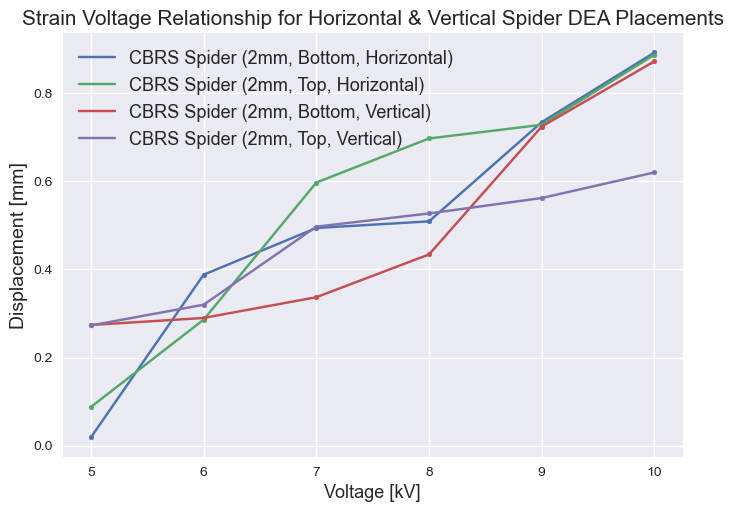

In [ ]:
keys = ['CBRS Spider (2mm, Bottom, Horizontal)', 'CBRS Spider (2mm, Top, Horizontal)', 'CBRS Spider (2mm, Bottom, Vertical)', 'CBRS Spider (2mm, Top, Vertical)']

for key in keys:
    y = var[key]
    plt.plot(x, y)
    
plt.legend(keys, fontsize="13", loc="upper left")
plt.title("Strain Voltage Relationship for Horizontal & Vertical Spider DEA Placements", fontsize="15")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")

for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o", s = 12, label = None)
plt.show()

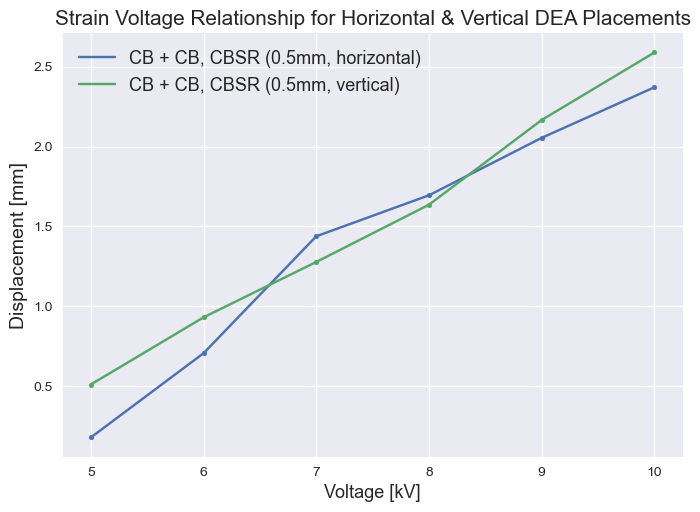

In [ ]:
keys = ['CB + CB, CBSR (0.5mm, horizontal)', 'CB + CB, CBSR (0.5mm, vertical)']

for key in keys:
    y = data[key]
    plt.plot(x, y)
    
plt.legend(keys, fontsize="13", loc="upper left")
plt.title("Strain Voltage Relationship for Horizontal & Vertical DEA Placements", fontsize="15")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")

for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o", s = 12, label = None)
plt.show()

In [ ]:
#########################################
## REVISED THEORETICAL Z step response ##
#########################################

volt_kV = np.linspace(0,10e3,11)
z_0_um = 500e-6

perm_0 = 8.854e-12
perm_r = 4.2 # http://dengpan.ca/reports/vhb.pdf pre-stretch dependent

Y_Pa = 450e3 # https://www.stockwell.com/data-sheets/vhb-tranfer-tapes-9473pc.pdf pre-stretch dependent??


# re-write this as a transfer function
stress_es = lambda V, z :  perm_0 * perm_r * (V**2 / z**2) 
S_z = lambda stress : -stress / Y_Pa
S_r = lambda S_z : np.sqrt(1 / (S_z + 1)) - 1
# TODO: using kelvin-voight model make an overdamped system!!

# TODO: or using fractional differential modelling do some parameter ID etc... (need to extract time series data from DEA videos...)

er = 100
tol = 1e-3
z_n_arr = []

while er > tol:

[    0.      637.488  2549.952  5737.392 10199.808 15937.2  ]
[-0.         -0.00448935 -0.01795741 -0.04040417 -0.07182963 -0.1122338 ]
[0.         0.00225226 0.00910147 0.02083564 0.03797322 0.06133063]


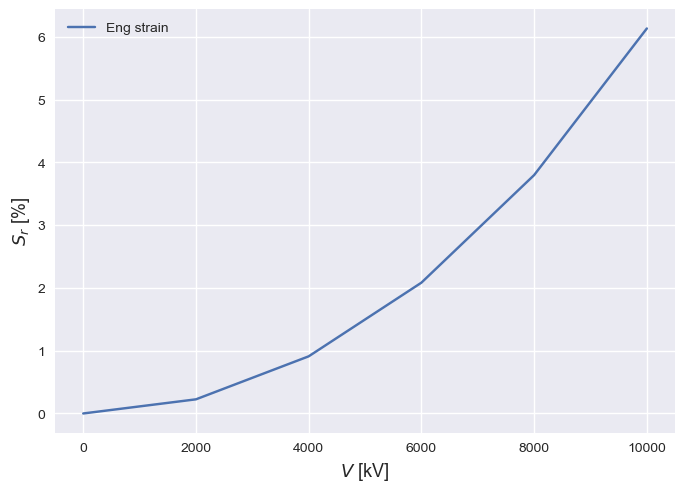

In [59]:
################################
## REVISED THEORETICAL STRAIN ##
################################


volt_kV = np.linspace(0e3,10e3,6)
z_0_um = 500e-6

perm_0 = 8.854e-12
perm_r = 4.5

Y_Pa = 142e3 # https://www.stockwell.com/data-sheets/vhb-tranfer-tapes-9473pc.pdf pre-stretch dependent??

stress_es = lambda V, z :  perm_0 * perm_r * (V**2 / z**2) # re-write this as a transfer function with a constant driving voltage??
S_z = lambda stress : -stress / Y_Pa
S_r = lambda S_z : np.sqrt(1 / (S_z + 1)) - 1

stress = stress_es(volt_kV, z_0_um)
print(stress)
strain_z = S_z(stress)
print(strain_z)
strain_r = S_r(strain_z)
print(strain_r)

plt.plot(volt_kV, strain_r*1e2, label="Eng strain")
plt.xlabel("$V$ [kV]", fontsize="13")
plt.ylabel("$S_r$ [%]", fontsize="13")
plt.legend()
plt.show()

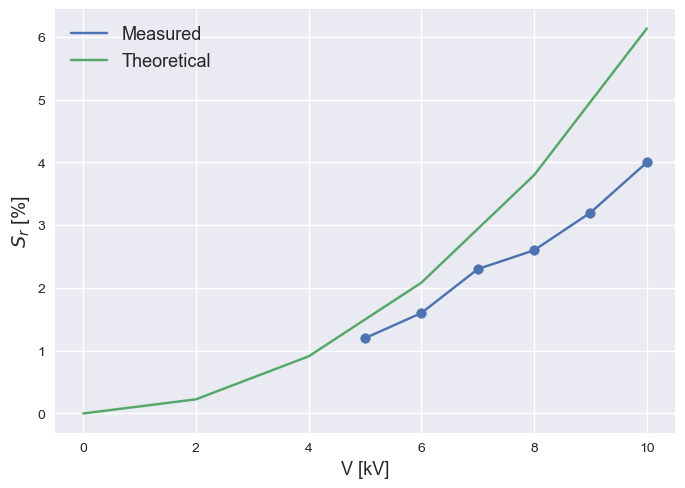

In [60]:
CB_data = var['CB']

plt.plot(x, CB_data, label="Measured")
plt.scatter(x, CB_data)
plt.plot(volt_kV/1e3, strain_r*1e2, label="Theoretical")
    
plt.legend(fontsize="13", loc="upper left")
plt.xlabel("V [kV]", fontsize="13")
plt.ylabel("$S_r$ [%]", fontsize="14")

plt.show()

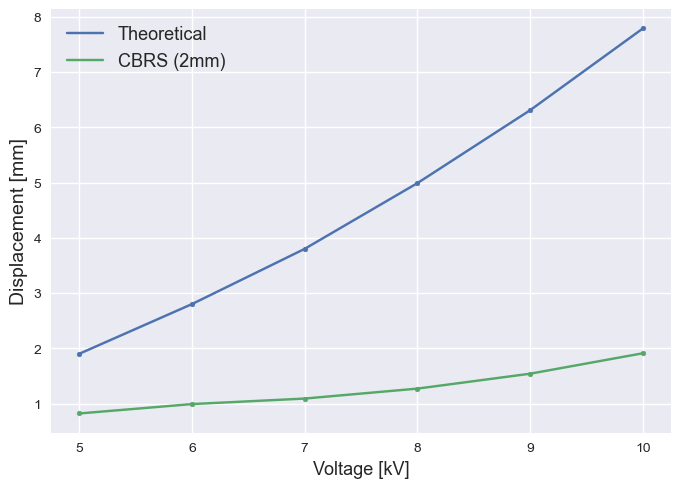

In [ ]:
keys = ['Theoretical', 'CBRS (2mm)']

for key in keys:
    y = var[key]
    plt.plot(x, y)

plt.legend(keys, fontsize="13", loc="upper left")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")

for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o", s = 12, label = None)
plt.show()

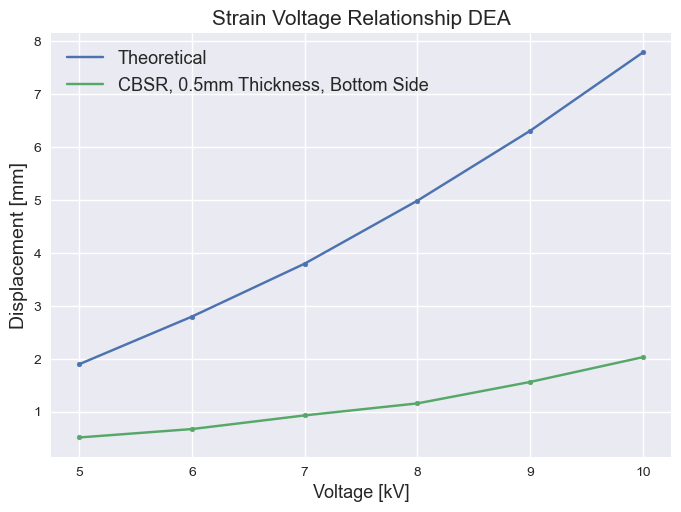

In [ ]:
keys = ['Theoretical', 'CBRS (0.5mm, bottom)']

for key in keys:
    y = var[key]
    plt.plot(x, y)

plt.legend(["Theoretical", "CBSR, 0.5mm Thickness, Bottom Side"], fontsize="13", loc="upper left")
plt.title("Strain Voltage Relationship DEA", fontsize="15")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")


for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o", s = 12, label = None)
plt.show()

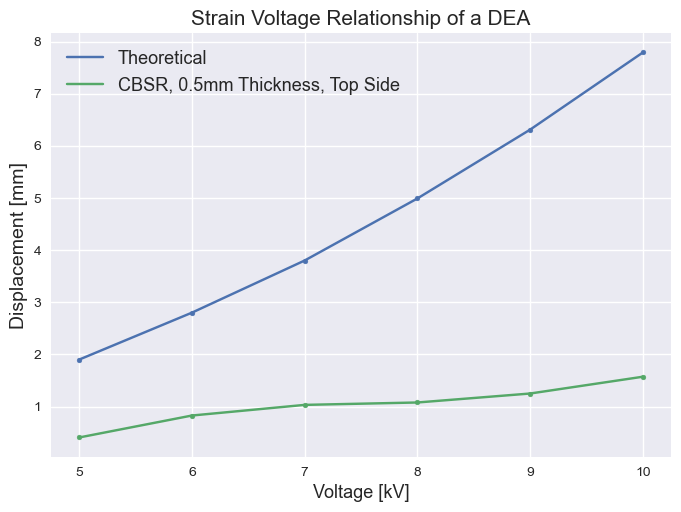

In [ ]:
keys = ['Theoretical', 'CBRS (0.5mm, top)']

for key in keys:
    y = var[key]
    plt.plot(x, y)

plt.legend(["Theoretical", "CBSR, 0.5mm Thickness, Top Side"], fontsize="13", loc="upper left")
plt.title("Strain Voltage Relationship of a DEA", fontsize="15")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")

for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o", s = 12, label = None)
plt.show()

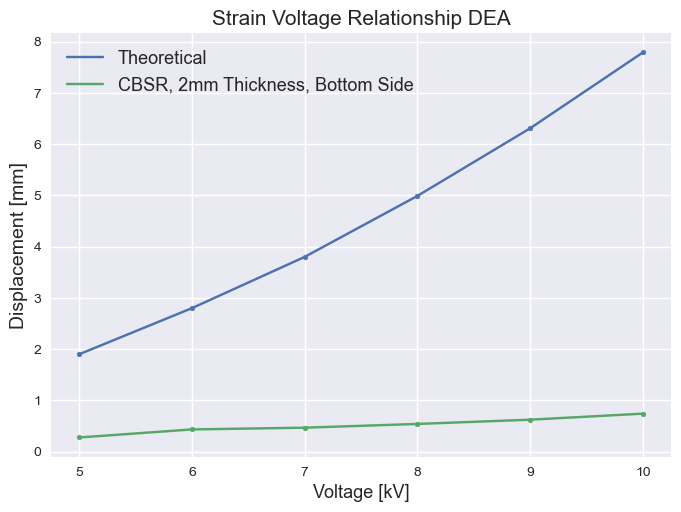

In [ ]:
keys = ['Theoretical', 'CBRS (2mm, bot)']

for key in keys:
    y = var[key]
    plt.plot(x, y)

plt.legend(["Theoretical", "CBSR, 2mm Thickness, Bottom Side"], fontsize="13", loc="upper left")
plt.title("Strain Voltage Relationship DEA", fontsize="15")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")

for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o", s = 12, label = None)
plt.show()

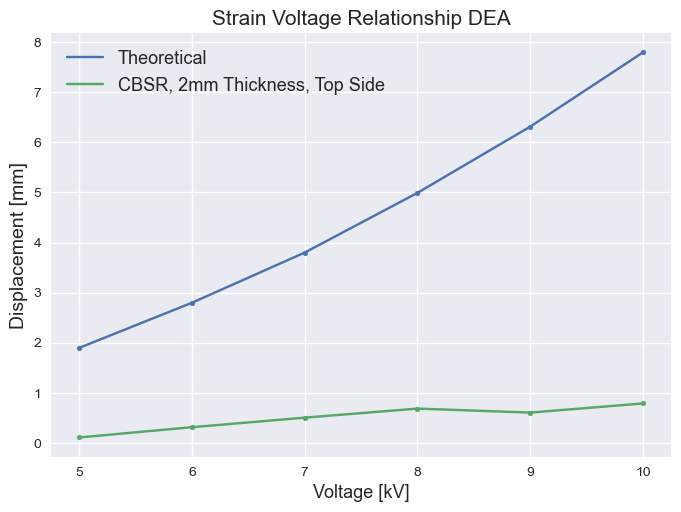

In [ ]:
keys = ['Theoretical', 'CBRS (2mm, top)']

for key in keys:
    y = var[key]
    plt.plot(x, y)

plt.legend(["Theoretical", "CBSR, 2mm Thickness, Top Side"], fontsize="13", loc="upper left")
plt.title("Strain Voltage Relationship DEA", fontsize="15")
plt.xlabel("Voltage [kV]", fontsize="13")
plt.ylabel("Displacement [mm]", fontsize="14")

for key in keys:
    y = var[key]
    plt.scatter(x, y, marker = "o", s = 12, label = None)
plt.show()

In [ ]:
# Code for determining new theoretical formula